In [1]:
# Import Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [5]:
##Load Data
# Load dataset (example: credit card fraud dataset)
df = pd.read_csv("creditcard.csv")

# Quick look at data
print(df.head())
print(df['Class'].value_counts())  # Check fraud/genuine counts assuming 'Class' column


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
#Separate Features and TargetAssuming the target column is named Class (1 = fraud, 0 = genuine):
X = df.drop('Class', axis=1)
y = df['Class']


In [9]:
#Split into Train/Test sets (stratify to keep class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


In [11]:
#Scale/Normalize Features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
#Handle Class Imbalance with SMOTE (oversampling minority class in training set)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())


Before SMOTE: Class
0    199020
1       344
Name: count, dtype: int64
After SMOTE: Class
0    199020
1    199020
Name: count, dtype: int64


In [15]:
# Train Model (Logistic Regression example)
model = LogisticRegression(random_state=42)
model.fit(X_train_res, y_train_res)


LogisticRegression(random_state=42)

In [17]:
#Evaluate model
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Confusion Matrix:
[[83410  1885]
 [   18   130]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9779    0.9887     85295
           1     0.0645    0.8784    0.1202       148

    accuracy                         0.9777     85443
   macro avg     0.5322    0.9281    0.5545     85443
weighted avg     0.9982    0.9777    0.9872     85443



##Hyperparameter Tuning with GridSearchCV

In [19]:
#imports
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load your full dataset
df = pd.read_csv("creditcard.csv")

# Take a 10% random sample to reduce memory usage
df_sample = df.sample(frac=0.1, random_state=42)

# Separate features and target
X = df_sample.drop('Class', axis=1).astype(np.float32)  # convert to float32
y = df_sample['Class']

# Train-test split (stratify to keep class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution before SMOTE:\n", y_train.value_counts())
print("Class distribution after SMOTE:\n", pd.Series(y_train_res).value_counts())

# Train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Class distribution before SMOTE:
 Class
0    19904
1       32
Name: count, dtype: int64
Class distribution after SMOTE:
 Class
0    19904
1    19904
Name: count, dtype: int64
Confusion Matrix:
 [[8396  135]
 [   0   14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      8531
           1       0.09      1.00      0.17        14

    accuracy                           0.98      8545
   macro avg       0.55      0.99      0.58      8545
weighted avg       1.00      0.98      0.99      8545



In [31]:
# Use 5% sample to reduce memory
df_sample = df.sample(frac=0.05, random_state=42)

# Rest same as before...

# Minimal grid params and n_jobs=1
param_grid_rf = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                       scoring='f1', cv=3, n_jobs=1, verbose=2)

# Optional: temporarily disable SMOTE to test stability
X_train_res, y_train_res = X_train_scaled, y_train

grid_rf.fit(X_train_res, y_train_res)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [50]},
             scoring='f1', verbose=2)

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("creditcard.csv")

# Use 5% sample of data to reduce memory load
df_sample = df.sample(frac=0.05, random_state=42)

# Separate features and target, convert features to float32
X = df_sample.drop('Class', axis=1).astype(np.float32)
y = df_sample['Class']

# Split into train/test with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Temporarily disable SMOTE to test stability
X_train_res, y_train_res = X_train_scaled, y_train

# Define Random Forest model
rf = RandomForestClassifier(random_state=42)

# Minimal hyperparameter grid
param_grid_rf = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# GridSearchCV with 3-fold CV, no parallel jobs
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                       scoring='f1', cv=3, n_jobs=1, verbose=2)

# Fit model
grid_rf.fit(X_train_res, y_train_res)

# Output best parameters and CV score
print("Best RF params:", grid_rf.best_params_)
print("Best RF F1 score (CV):", grid_rf.best_score_)

# Predict on test set and evaluate
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.9s
Best RF params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best RF F1 score (CV): 0.42857142857142855
Confusion Matrix:
 [[4265    1]
 [   1    5]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4266
           1       0.83      0.83      0.83         6

    accuracy                           1.00      4272
   macro avg       0.92      0.92      0.92      4272
weighted avg       1.00      1.00      1.00      4272



In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


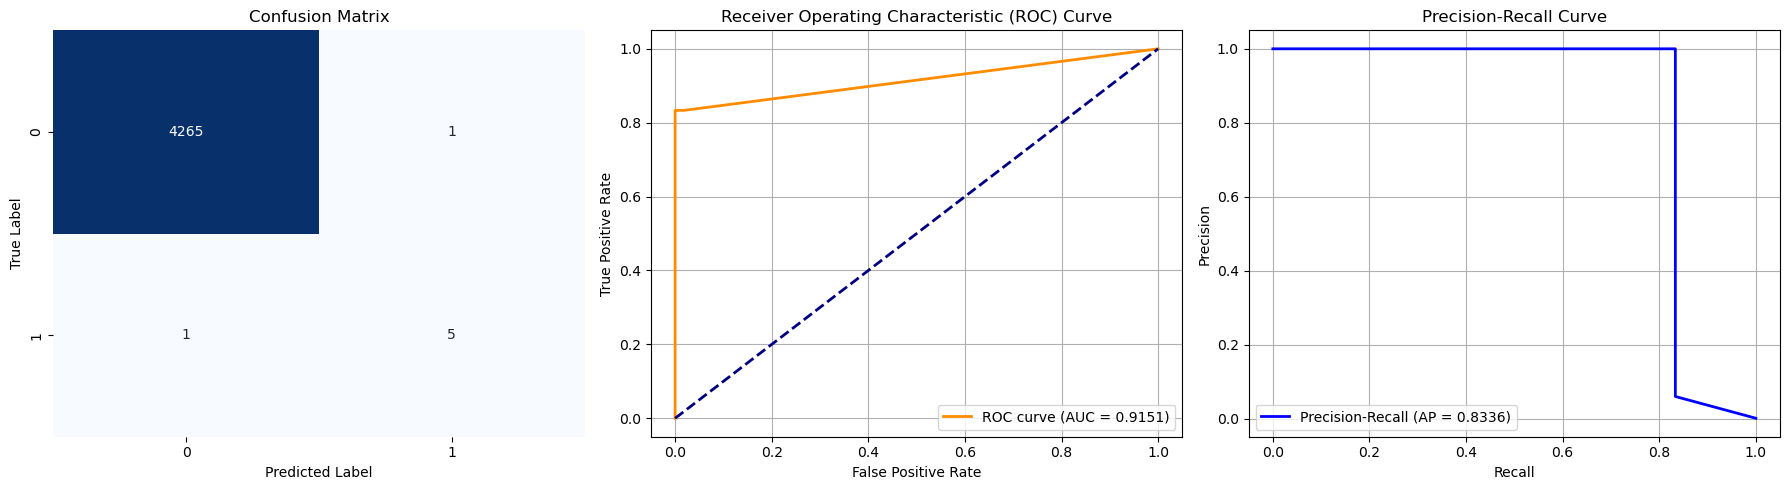

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# Assuming y_test, y_pred_rf, y_scores_rf are available
y_scores_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

cm = confusion_matrix(y_test, y_pred_rf)
fpr, tpr, _ = roc_curve(y_test, y_scores_rf)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_scores_rf)
avg_precision = average_precision_score(y_test, y_scores_rf)

plt.figure(figsize=(18, 5))

# 1. Confusion Matrix Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('confusion_matrix.png')

# 2. ROC Curve
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('roc_curve.png')

# 3. Precision-Recall Curve
plt.subplot(1, 3, 3)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall (AP = {avg_precision:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.savefig('precision_recall_curve.png')

plt.show()


In [41]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# Create directory 'plots' if it doesn't exist
os.makedirs('plots', exist_ok=True)

# Assuming y_test, y_pred_rf, y_scores_rf are available
y_scores_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

cm = confusion_matrix(y_test, y_pred_rf)
fpr, tpr, _ = roc_curve(y_test, y_scores_rf)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_scores_rf)
avg_precision = average_precision_score(y_test, y_scores_rf)

plt.figure(figsize=(18, 5))

# 1. Confusion Matrix Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('plots/confusion_matrix.pdf')
plt.clf()  # Clear figure for next plot

# 2. ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/roc_curve.pdf')
plt.clf()

# 3. Precision-Recall Curve
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall (AP = {avg_precision:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/precision_recall_curve.pdf')
plt.clf()

print("Plots saved as PDF files in the 'plots' folder.")


Plots saved as PDF files in the 'plots' folder.


<Figure size 1800x500 with 0 Axes>